# Descriptive Examination

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Read the data
data = pd.read_csv("E-Com Clean.csv", index_col = False)

In [0]:
data = data.drop("Unnamed: 0", axis = 1)

In [4]:
data.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
6,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
7,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
8,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
9,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses


## Summary Statistics

In [91]:
data.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,921.306159,200.226312,1.0,861.0,936.0,1078.0,1205.0
Age,43.260133,12.258175,18.0,34.0,41.0,52.0,99.0
Rating,4.183187,1.112211,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818186,0.385701,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.652342,5.834167,0.0,0.0,1.0,3.0,122.0


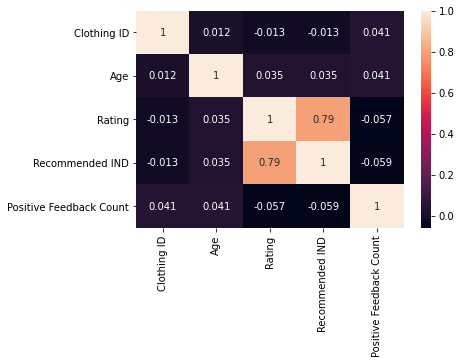

In [92]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Data Exploration by Visualizations

### Customer's Age Distribution

Text(0, 0.5, 'Density')

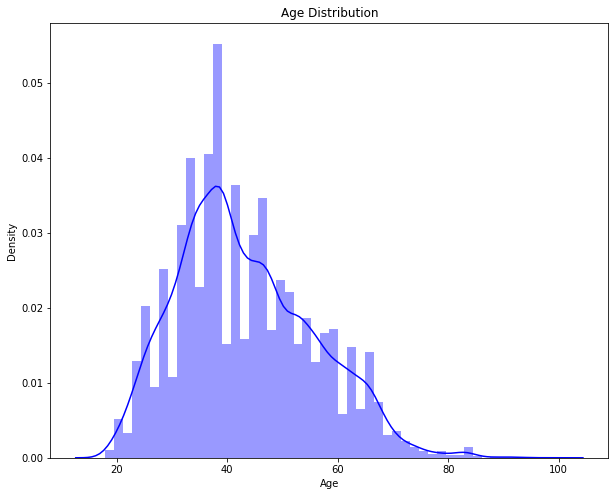

In [93]:
fig = plt.figure(figsize=(10, 8))
sns.distplot(data["Age"], color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

##### We can see from the above graph, the majority of ages among customers are between 30 to 50, which also can thought as the target customers of this brand.

### Rating and Recommended IND Distirbution

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Recommended'),
 Text(0.5, 1.0, 'Recommended Counts')]

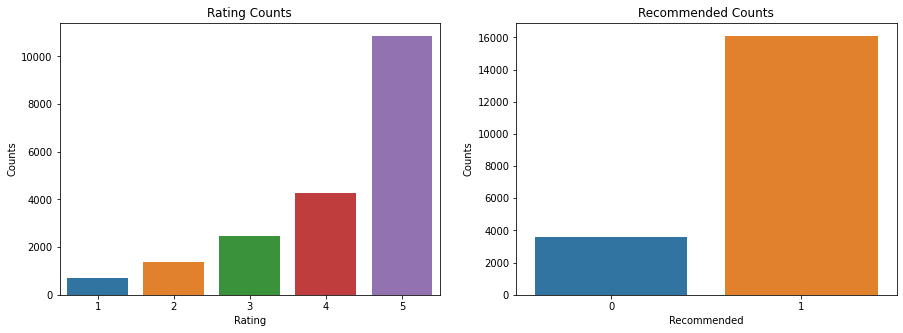

In [94]:
# Rating / Recommended
f, axes = plt.subplots(1, 2, figsize=(15,5))

ax1 = sns.countplot(data['Rating'], ax = axes[0])
ax1.set(xlabel='Rating', ylabel='Counts', title="Rating Counts")

ax2 = sns.countplot(data['Recommended IND'], ax = axes[1])
ax2.set(xlabel='Recommended', ylabel='Counts', title="Recommended Counts")

##### 1.   From the above left-handed side graph, we can see that the majority of reviews are highly positive, since most of the rating scores are 4 and 5 out of 5.

##### 2.   From the above right-handed side graph, Recommended IND is a binary variable. If the customer recommends the product, Recommended IND = 1. Otherwise Recommended IND = 0, meaning the customer does not recommend the product. The majority customer seem to recommend the product.



Text(0.5, 1.0, 'Rating v.s. Recommended')

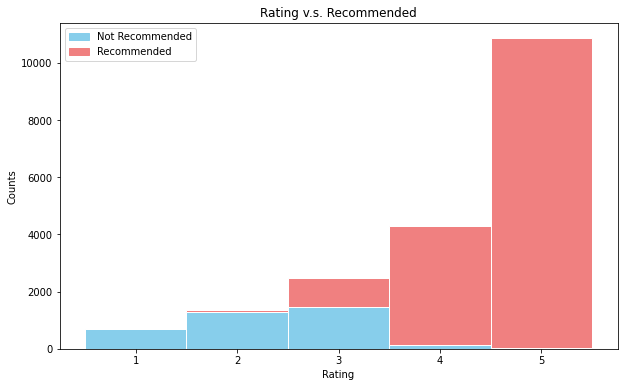

In [95]:
# Rating vs Recommended
fig = plt.figure(figsize=(10,6))
r = [1,2,3,4,5]
x1 = []
for i in range(1,6,1):
    x1.append(len(data[(data['Recommended IND'] == 0) & (data['Rating'] == i)]))
    
x2 = []
for i in range(1,6,1):
    x2.append(len(data[(data['Recommended IND'] == 1) & (data['Rating'] == i)]))


# Assign colors for recommended and the names
colors = ['skyblue', 'lightcoral']
names = ['Not Recommended', 'Recommended']

# Names of group and bar width
names = ['1','2','3','4','5']
barWidth = 1
         
# Create lower bars
plt.bar(r, x1, color='skyblue', edgecolor='white', width=barWidth)
# Create upper bars, on top of the firs ones
plt.bar(r, x2, bottom=x1, color='lightcoral', edgecolor='white', width=barWidth)


# Plot formatting
plt.xticks(r, names)
plt.xlabel("Rating")
plt.ylabel('Counts')
blue_patch = mpatches.Patch(color='skyblue', label='Not Recommended')
pink_patch = mpatches.Patch(color='lightcoral', label='Recommended')
plt.legend(handles=[blue_patch, pink_patch])
plt.title('Rating v.s. Recommended')

##### From the above graph, we can see that when the product's rating score is 3, the majority of customers do not recommend for the product. It would be helpful to the business if we can analyze more to find the reason.

### Age and Rating Distribution

Text(0.5, 1.0, 'Age v.s. Rating Counts')

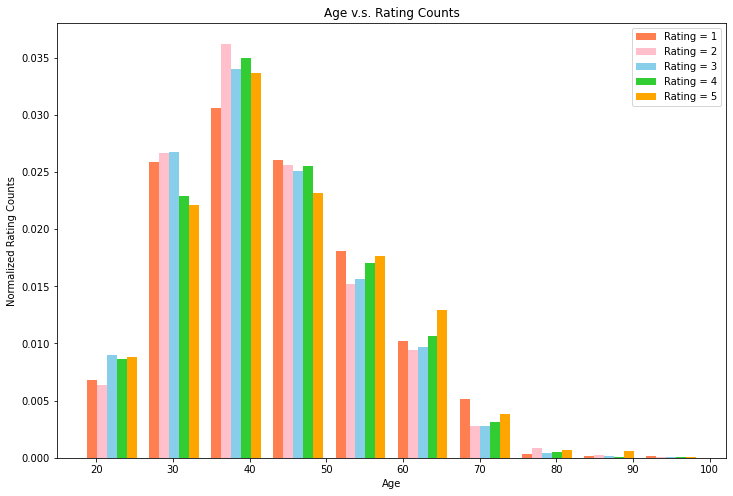

In [96]:
# Age vs Rating
fig = plt.figure(figsize=(12, 8))
x1 = list(data[data['Rating']  == 1]['Age'])
x2 = list(data[data['Rating'] == 2]['Age'])
x3 = list(data[data['Rating'] == 3]['Age'])
x4 = list(data[data['Rating'] == 4]['Age'])
x5 = list(data[data['Rating'] == 5]['Age'])

# Assign colors for each airline and the names
colors = ['coral', 'pink', 'skyblue', 'limegreen', 'orange']
names = ['Rating = 1', 'Rating = 2', 'Rating = 3','Rating = 4', 'Rating = 5']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], density = 1, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normalized Rating Counts')
plt.title('Age v.s. Rating Counts')

##### From the previous analysis, we can know that our majority target customers' ages are between 30 to 50. 

##### From the above graph, there is an interesting finding, we can see that within majority target customers groups, customers that give lower rating score(1-2) are more than those who give higher rating score(4-5). It seems that within younger customers(ages around 20) and older customers(ages around 60) groups, customer give more higher rating score(4-5). It would also be helpful to the business if we can analyze more to find the reason why in the majority target customers' group, cusotmers relatively leave more lower rating score(1-2) than higher rating score(4-5).

## Create Word Clouds

In [0]:
# Import Libraries
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [0]:
def clean_text_data(text_data):
    word_list = []
    for val in text_data:
        text = str(val)
        text = text.lower()
        tokens = word_tokenize(text)
        words = [word for word in tokens if word.isalpha()]
        for w in words:
            word_list.append(w)
    return(word_list)

In [0]:
def create_cloud_graph(string):
    stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse', 'looked', 'look', 'looks'}
    s = " "
    ww = s.join(string)
    wordcloud = WordCloud(width=1600, height=800, max_words = 100, stopwords = stopwords).generate(ww)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [0]:
data1 = data

### Word Cloud for Rating Score is 5 and 4

In [101]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

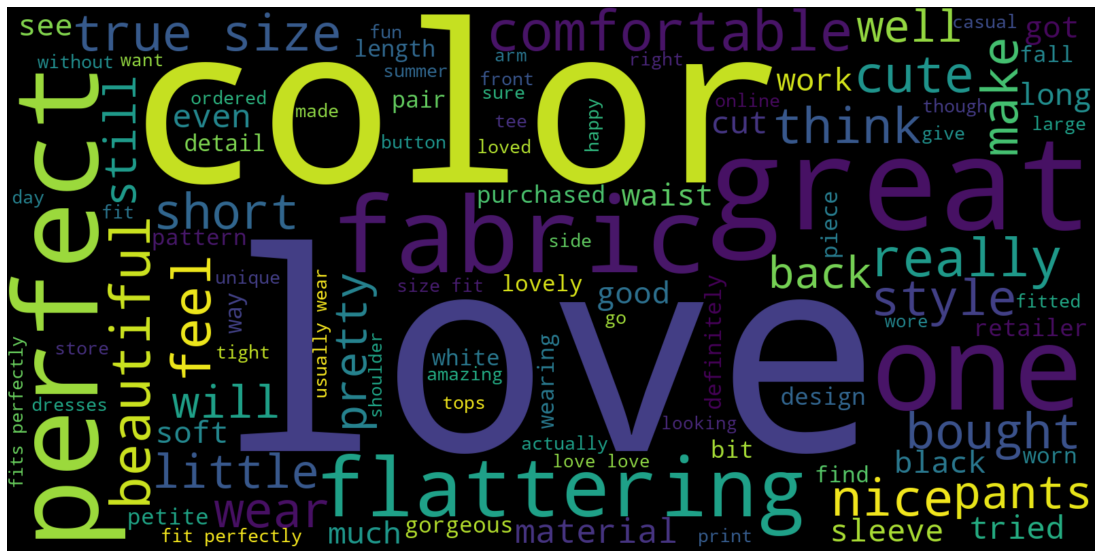

In [102]:
#Rating = 5
rating5 = clean_text_data(data1[data1['Rating']==5]['Review Text'])
create_cloud_graph(rating5)

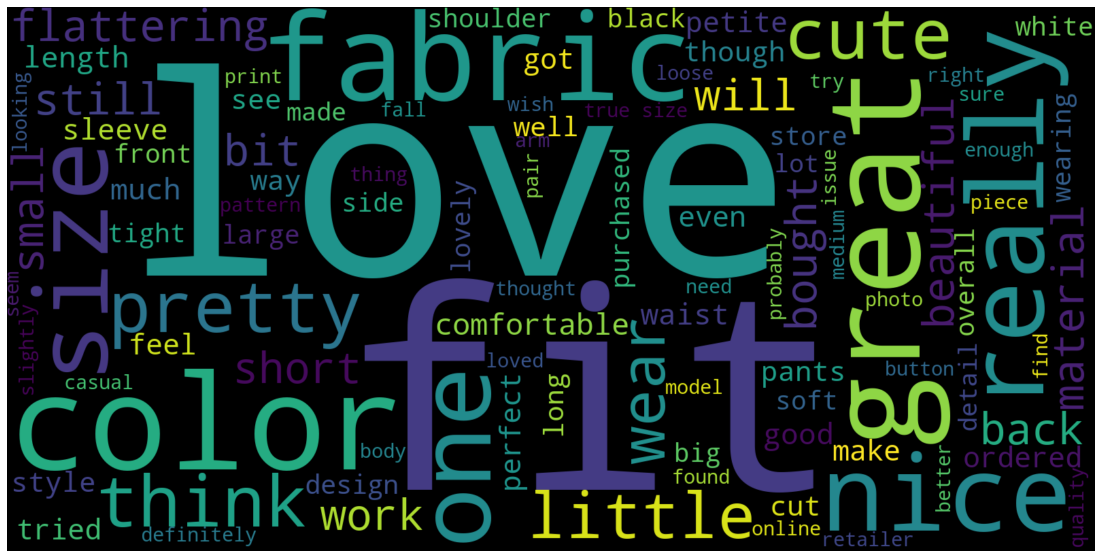

In [103]:
#Rating = 4
rating4 = clean_text_data(data1[data1['Rating']==4]['Review Text'])
create_cloud_graph(rating4)

##### When Rating Score is 5 or 4, most of the frequently used words in the review texts are positive, such as love, great, perfect, beautiful, comfortable.

### Word Cloud for Rating Score is 3

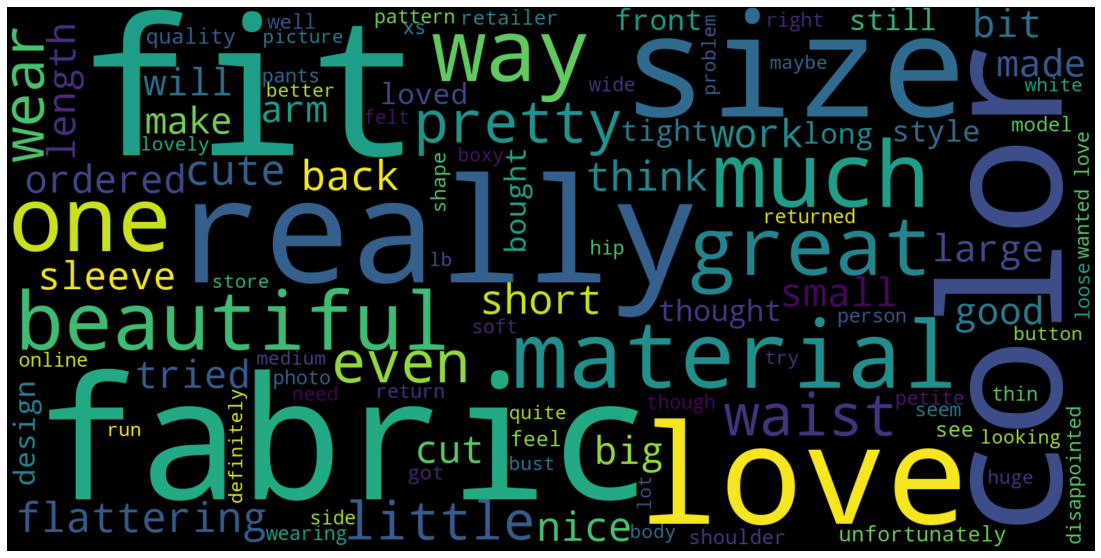

In [104]:
#Rating = 3
rating3 = clean_text_data(data1[data1['Rating']==3]['Review Text'])
create_cloud_graph(rating3)

##### When Rating Score is 3, top words are love, fabric, color, really, fit. However, there are not just positive words used in the review texts, but also negative words appear, such as disappointed, unfortunately.

### Word Cloud for Rating Score is 1 and 2

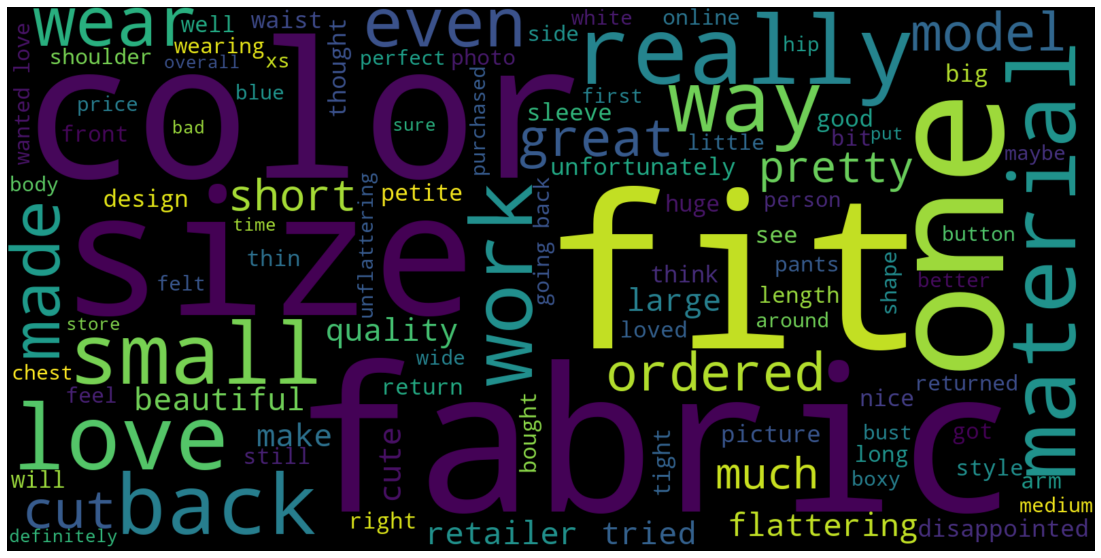

In [105]:
#Rating = 2
rating2 = clean_text_data(data1[data1['Rating']==2]['Review Text'])
create_cloud_graph(rating2)

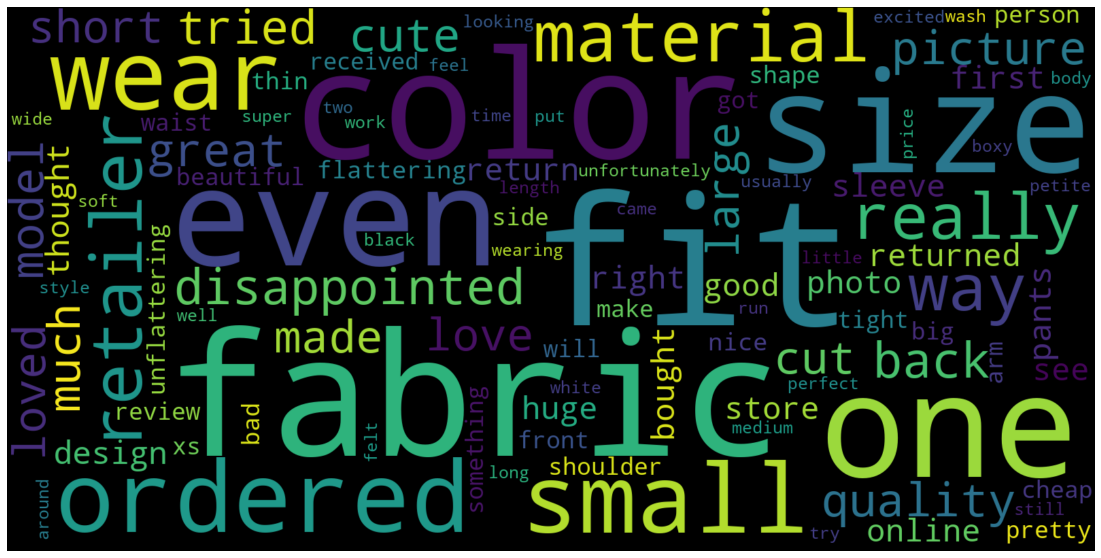

In [106]:
#Rating = 1
rating1 = clean_text_data(data1[data1['Rating']==1]['Review Text'])
create_cloud_graph(rating1)

##### When Rating Score is 1 or 2, there are more negative words than positive words used in the review texts, such as returned, cheap, unflattering, bad, disappointed, unfortunately.

# Text Processing

In [8]:
# Import Library
import nltk  
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import numpy as np
import pandas as pd  
import random  
import string
  
import re

# Pre-processing
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
# Check the review text
data2 = data
data2["Review Text"].head()

0    I had such high hopes for this dress and reall...
1    I love, love, love this jumpsuit. it's fun, fl...
2    This shirt is very flattering to all due to th...
3    I love tracy reese dresses, but this one is no...
4    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

## Clean the text content

In [10]:
# Set up for text cleaning
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 
word_list = []
text_data = data2["Review Text"]
# Cleaning process
for i in range(len(text_data)):
  td = data2["Review Text"][i]
  text = str(td)
  text = text.lower()
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  words = [w for w in words if not w in stop_words]
  clean_words = [lemmatizer.lemmatize(word) for word in words]
  for cw in clean_words:
    word_list.append(cw)
  cleanedList = [x for x in word_list if x != 'nan']
  data2['Review Text'][i] = " ".join(cleanedList)
  word_list[:] = []
  cleanedList[:] = []

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
# Check the data
data2

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,love tracy reese dress one petite foot tall us...,2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
19658,1104,34,Great dress for many occasions,happy snag dress great price easy slip flatter...,5,1,0,General Petite,Dresses,Dresses
19659,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits
19660,1104,31,"Cute, but see through",fit well top see never would worked glad able ...,3,0,1,General Petite,Dresses,Dresses
19661,1084,28,"Very cute dress, perfect for summer parties an...",bought dress wedding summer cute unfortunately...,3,1,2,General,Dresses,Dresses


## Vectorize Text Data

### Count how many times each term shows up in each review

In [0]:
def text_vectorizing_process(string):
    return [word for word in string.split()]

In [12]:
# Using the CountVectorizer class to get a count of words from the review text
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(text_vectorizing_process, ngram_range=(1,2), min_df=.005, max_df=.9)
cvec.fit(data2['Review Text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=<function text_vectorizing_process at 0x7fdd7c0d5620>,
                lowercase=True, max_df=0.9, max_features=None, min_df=0.005,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
# Get the total n-gram count
len(cvec.vocabulary_)

986

### Term counts for each review

In [14]:
# Creating the bag-of-words representation 
cvec_counts = cvec.transform(data2['Review Text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (19663, 986)
nonzero count: 466668
sparsity: 2.41%


### Calculate the weights for each term in each review

In [15]:
# Instantiating the TfidfTransformer
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<19663x986 sparse matrix of type '<class 'numpy.float64'>'
	with 466668 stored elements in Compressed Sparse Row format>

### Get TF-IDF Matrix

In [16]:
# Getting a list of all n-grams
transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names()

# Putting weighted n-grams into a DataFrame and computing some summary statistics
model = pd.DataFrame(transformed_weights, columns=vocab)
model['Keyword'] = model.idxmax(axis=1)
model['Max'] = model.max(axis=1)
model['Sum'] = model.drop('Max', axis=1).sum(axis=1)
model.head(10)

,able,absolutely,absolutely love,across,actually,add,added,addition,adorable,adore,afraid,ago,agree,agree reviewer,airy,almost,along,already,also,although,always,amazing,amount,ankle,another,another reviewer,anyone,anything,anyway,appears,appropriate,area,arm,arm hole,armhole,around,around waist,arrived,athletic,available,...,wider,winter,wish,without,wo,woman,wonderful,wool,wore,work,work well,worked,worn,worried,worth,worth price,would,would definitely,would fit,would look,would recommend,would say,would wear,would work,wow,wrap,wrinkle,wrong,xl,xx,year,yellow,yes,yesterday,yet,zip,zipper,Keyword,Max,Sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097701,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.17943,0.155960,layer,0.446966,5.365309
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,love love,0.571779,3.303426
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,shirt,0.402921,3.679952
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133538,0.0,0.0,0.0,0.0,0.0,0.0,0.105525,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,dress,0.372335,4.912738
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111520,0.0,0.0,0.240212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,trying,0.441718,4.774753
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178675,0.113172,0.0,0.165208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182797,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,went,0.293516,5.633368
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,run little,0.336428,4.093326
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127789,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,petite,0.268576,5.449133
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0

## Review Text Exploration

### Merge TD-IDF Matrix with original dataset



In [0]:
# Merging td-idf weight matrix with original DataFrame data2
model = pd.merge(data2, model, left_index=True, right_index=True)

In [18]:
# Check the merged dataset
model.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,able,absolutely,absolutely love,across,actually,add,added,addition,adorable,adore,afraid,ago,agree,agree reviewer,airy,almost,along,already,also,although,always,amazing,amount,ankle,another,another reviewer,anyone,anything,anyway,appears,...,wider,winter,wish,without,wo,woman,wonderful,wool,wore,work,work well,worked,worn,worried,worth,worth price,would,would definitely,would fit,would look,would recommend,would say,would wear,would work,wow,wrap,wrinkle,wrong,xl,xx,year,yellow,yes,yesterday,yet,zip,zipper,Keyword,Max,Sum
0,1077,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097701,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.17943,0.155960,layer,0.446966,5.365309
1,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,love love,0.571779,3.303426
2,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,shirt,0.402921,3.679952
3,1080,49,Not for the very petite,love tracy reese dress one petite foot tall us...,2,0,4,General,Dresses,Dresses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133538,0.0,0.0,0.0,0.0,0.0,0.0,0.105525,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,dress,0.372335,4.912738
4,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111520,0.0,0.0,0.240212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,trying,0.441718,4.774753
5,858,39,"Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,4,1,4,General Petite,Tops,Knits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178675,0.113172,0.0,0.165208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182797,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,went,0.293516,5.633368
6,1077,24,Flattering,love dress usually get x run little snug bust ...,5,1,0,General,Dresses,Dresses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,run little,0.336428,4.093326
7,1077,34,Such a fun dress!,lb ordered petite make sure length long typica...,5,1,0,General,Dresses,Dresses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### View what are the top 30 frequently occured words in the review

In [19]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(30)

,Term,Occurrences
190,dress,10060
270,fit,9093
743,size,8403
474,love,7754
868,top,7354
436,like,6281
127,color,6159
461,look,6146
927,wear,5787
335,great,5285


#### We can see that most of the top frequently occured words are positive, such as love, like, great.

### View what are the top 30 weighted occured words in the review

In [20]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(30)

,Term,Weight
190,dress,0.050552
270,fit,0.040276
474,love,0.039777
868,top,0.038891
743,size,0.038809
127,color,0.032835
335,great,0.032296
461,look,0.031851
436,like,0.031708
927,wear,0.030536


#### We can see that the top 30 weighted words are mostly simliar to top frequently occured words, only slightly different.

# Machine Learning

## Set-Up

In [0]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree, metrics

In [0]:
model_p = model

In [0]:
# Deal with Rating
model_p['Rating_3'] = [1 if x == 3 else 0 for x in model_p['Rating']]
model_p['Rating_12'] = [1 if x == 1 or x == 2 else 0 for x in model_p['Rating']]
model_p['Rating_45'] = [1 if x == 4 or x == 5 else 0 for x in model_p['Rating']]

In [126]:
model_p

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,able,absolutely,absolutely love,across,actually,add,added,addition,adorable,adore,afraid,ago,agree,agree reviewer,airy,almost,along,already,also,although,always,amazing,amount,ankle,another,another reviewer,anyone,anything,anyway,appears,...,without,wo,woman,wonderful,wool,wore,work,work well,worked,worn,worried,worth,worth price,would,would definitely,would fit,would look,would recommend,would say,would wear,would work,wow,wrap,wrinkle,wrong,xl,xx,year,yellow,yes,yesterday,yet,zip,zipper,Keyword,Max,Sum,Rating_3,Rating_12,Rating_45
0,1077,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.097701,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17943,0.15596,layer,0.446966,5.365309,1,0,0
1,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,love love,0.571779,3.303426,0,0,1
2,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,shirt,0.402921,3.679952,0,0,1
3,1080,49,Not for the very petite,love tracy reese dress one petite foot tall us...,2,0,4,General,Dresses,Dresses,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.133538,0.0,0.000000,0.0,0.0,0.000000,0.0,0.105525,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,dress,0.372335,4.912738,0,1,0
4,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.111520,0.0,0.0,0.240212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,trying,0.441718,4.774753,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19658,1104,34,Great dress for many occasions,happy snag dress great price easy slip flatter...,5,1,0,General Petite,Dresses,Dresses,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,dress great,0.448722,3.135788,0,0,1
19659,862,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,

In [127]:
# Get a list of columns for deletion
model_p.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name',
       ...
       'yesterday', 'yet', 'zip', 'zipper', 'Keyword', 'Max', 'Sum',
       'Rating_3', 'Rating_12', 'Rating_45'],
      dtype='object', length=1002)

In [0]:
# Drop features not for training
ml_model3= model_p.drop(['Clothing ID','Title', 'Age','Recommended IND','Positive Feedback Count','Review Text','Rating', 'Division Name', 'Class Name','Department Name', 'Keyword', 'Max', 'Sum'], axis=1)

In [25]:
ml_model3.columns

Index(['able', 'absolutely', 'absolutely love', 'across', 'actually', 'add',
       'added', 'addition', 'adorable', 'adore',
       ...
       'year', 'yellow', 'yes', 'yesterday', 'yet', 'zip', 'zipper',
       'Rating_3', 'Rating_12', 'Rating_45'],
      dtype='object', length=989)

### Split dataset into traing and testing sets

In [0]:
# Create X & y variables for Machine Learning
X = ml_model3.drop(['Rating_12', 'Rating_3', 'Rating_45'], axis=1)
y = ml_model3[['Rating_12', 'Rating_3', 'Rating_45']]

# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Logistic Regression

In [0]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [28]:
# Logistic Regression
log_model = LogisticRegression(class_weight='balanced', solver = "lbfgs", C = 0.01)
log_model.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Training Accuracy
y_pred_train = log_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.7711421098517872


In [30]:
# Testing Accuracy
y_pred = log_model.predict(X_test)
print(classification_report(np.argmax(y_test.to_numpy(), axis = 1),y_pred))
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.43      0.61      0.50       633
           1       0.31      0.44      0.36       723
           2       0.94      0.82      0.87      4543

    accuracy                           0.75      5899
   macro avg       0.56      0.62      0.58      5899
weighted avg       0.80      0.75      0.77      5899

Accuracy of Testing Data: 0.7492795389048992


## KNN

In [0]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [136]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
# Training Accuracy
y_pred_train = knn_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(y_train, y_pred_train))

Accuracy of Training Data: 0.7959168846265621


In [138]:
# Testing Accuracy
y_pred = knn_model.predict(X_test)
print("Accuracy of Testing Data:", accuracy_score(y_test, y_pred))

Accuracy of Testing Data: 0.754195626377352


In [33]:
# RadiasNeighborsClassifier
rn_model = RadiusNeighborsClassifier(radius=10.0)
rn_model.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=10.0, weights='uniform')

In [34]:
# Training Accuracy
y_pred_train = rn_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(y_train, y_pred_train))

Accuracy of Training Data: 0.7704882301656495


In [35]:
# Testing Accuracy
y_pred = rn_model.predict(X_test)
print("Accuracy of Testing Data:", accuracy_score(y_test, y_pred))

Accuracy of Testing Data: 0.7701305305984065


## SVM

In [0]:
# Import Libraries
from sklearn.svm import SVC

In [143]:
# Linear SVM
svc_model_linear = SVC(kernel='linear',class_weight='balanced')
svc_model_linear.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
# Training Accuracy
y_pred_train = svc_model_linear.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.801438535309503


In [145]:
# Testing Accuracy
y_pred = svc_model_linear.predict(X_test)
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

Accuracy of Testing Data: 0.7308018308187828


In [0]:
# Polynomial SVM
svc_model_poly = SVC(kernel='poly',class_weight='balanced')
svc_model_poly.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

In [0]:
# Training Accuracy
y_pred_train = svc_model_poly.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

In [0]:
# Testing Accuracy
y_pred = svc_model_poly.predict(X_test)
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

In [37]:
# Radial SVM
svc_model_rbf = SVC(kernel='rbf',class_weight='balanced')
svc_model_rbf.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
# Training Accuracy
y_pred_train = svc_model_rbf.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.9595321127579192


In [39]:
# Testing Accuracy
y_pred = svc_model_rbf.predict(X_test)
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

Accuracy of Testing Data: 0.8021698592981862


## Naive Bayes

In [0]:
# Import Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [0]:
# Gaussain NB
gnb_model = GaussianNB()
gnb_model.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

In [0]:
# Training Accuracy
y_pred_train = gnb_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

In [0]:
# Testing Accuracy
y_pred = gnb_model.predict(X_test)
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

In [41]:
# Multinomial NB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
# Training Accuracy
y_pred_train = mnb_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.7970066841034583


In [43]:
# Testing Accuracy
y_pred = mnb_model.predict(X_test)
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

Accuracy of Testing Data: 0.7914900830649263


## QDA

In [0]:
# Import Libraries
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [45]:
# QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [46]:
# Training Accuracy
y_pred_train = qda_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.952339436210404


In [47]:
# Testing Accuracy
y_pred = qda_model.predict(X_test)
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

Accuracy of Testing Data: 0.7862349550771317


## Random Forest Classifier

In [0]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# Random forest Classifier
rf_model = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [50]:
# Training Accuracy
y_pred_train = rf_model.predict(X_train)
print("Accuracy of Testing Data:", accuracy_score(y_train.values.argmax(axis = 1), y_pred_train.argmax(axis = 1)))

Accuracy of Testing Data: 1.0


In [51]:
# Testing Accuracy
y_pred = rf_model.predict(X_test)
print("Accuracy of Testing Data:", accuracy_score(y_test.values.argmax(axis = 1), y_pred.argmax(axis = 1)))

Accuracy of Testing Data: 0.8062383454822851


### Plot Results

In [0]:
# Labels are the values we want to predict
labels = list(y_train.columns)
# Saving feature names for later use
feature_list = list(X_train.columns)

In [67]:
# Get numerical feature importances
importances = list(rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances = feature_importances[0:25]
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: love                 Importance: 0.012065919689841718
Variable: great                Importance: 0.009600709631059004
Variable: perfect              Importance: 0.009572740156556523
Variable: fit                  Importance: 0.008872049518605915
Variable: little               Importance: 0.00860186363395222
Variable: color                Importance: 0.008566381919464117
Variable: comfortable          Importance: 0.007792918678008955
Variable: size                 Importance: 0.007544750482955936
Variable: like                 Importance: 0.0074847500463496265
Variable: look                 Importance: 0.007258749357073349
Variable: would                Importance: 0.0071056563797934034
Variable: dress                Importance: 0.006683540668587811
Variable: wear                 Importance: 0.006601761903830733
Variable: top                  Importance: 0.00653895261467493
Variable: fabric               Importance: 0.0062030197082978975
Variable: disappointed         Importan

In [0]:
# Plot Feature Importance
y_value = []
x_value = []
for i in range(len(feature_importances)):
  y_value.append(feature_importances[i][0])
  x_value.append(feature_importances[i][1])

Text(0.5, 1.0, 'Feature Importance')

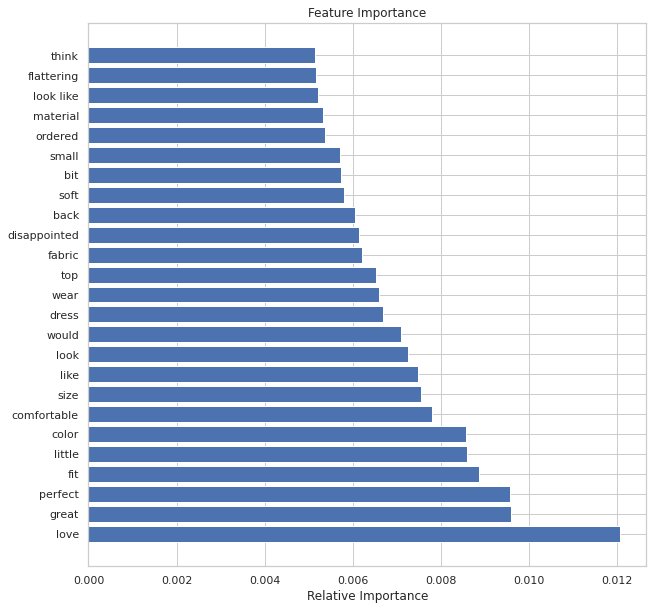

In [69]:
y_pos = np.arange(len(y_value))
plt.figure(figsize=(10,10))
plt.barh(y_pos, x_value, align='center')
plt.yticks(y_pos, y_value)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

In [0]:
# Creating a plot for feature importance
def importance_plotting(data,x,y,palette,title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data,y_vars=y,x_vars=x,size=6,aspect=1)
    ft.map(sns.stripplot,orient='h',palette=palette, edgecolor="black",size=15)
    for ax, title in zip(ft.axes.flat, titles):
        
    # Set a different title for each axes
        ax.set(title=title)
        
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


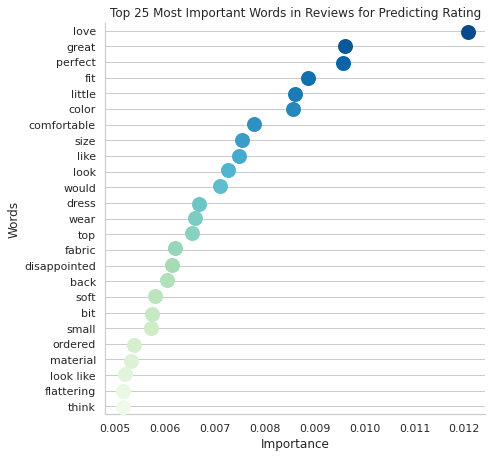

In [71]:
fi = {'Words':feature_list,'Importance':importances}

# Bung these into a dataframe, rank highest to lowest then slice top 20
Importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False).head(25)

# Plot the graph!
titles = ["Top 25 Most Important Words in Reviews for Predicting Rating"]
importance_plotting(Importance,'Importance','Words','GnBu_r',titles)

## Boosting

In [0]:
# Import Libraries
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [72]:
# XGBoost
xgb_model = XGBClassifier(learning_rate =0.01, n_estimators=1000, max_depth=4, gamma=0, objective= 'multi:softmax', num_class=3, seed=27)
xgb_model.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=1, verbosity=1)

In [73]:
# Training Accuracy
y_pred_train = xgb_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.8257773902935194


In [74]:
# Testing Accuracy
y_pred = xgb_model.predict(X_test)
print(classification_report(np.argmax(y_test.to_numpy(), axis = 1),y_pred))
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.60      0.20      0.30       633
           1       0.40      0.09      0.15       723
           2       0.81      0.99      0.89      4543

    accuracy                           0.80      5899
   macro avg       0.61      0.43      0.45      5899
weighted avg       0.74      0.80      0.74      5899

Accuracy of Testing Data: 0.7953890489913544


In [75]:
# AdaBoost
ada_model = AdaBoostClassifier(learning_rate =0.01, n_estimators=1000)
ada_model.fit(X_train, np.argmax(y_train.to_numpy(), axis = 1))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1000, random_state=None)

In [76]:
# Training Accuracy
y_pred_train = ada_model.predict(X_train)
print("Accuracy of Training Data:", accuracy_score(np.argmax(y_train.to_numpy(), axis = 1), y_pred_train))

Accuracy of Training Data: 0.7744841615809358


In [77]:
# Testing Accuracy
y_pred = ada_model.predict(X_test)
print(classification_report(np.argmax(y_test.to_numpy(), axis = 1),y_pred))
print("Accuracy of Testing Data:",metrics.accuracy_score(np.argmax(y_test.to_numpy(), axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.78      0.02      0.04       633
           1       0.50      0.00      0.01       723
           2       0.77      1.00      0.87      4543

    accuracy                           0.77      5899
   macro avg       0.68      0.34      0.31      5899
weighted avg       0.74      0.77      0.68      5899

Accuracy of Testing Data: 0.7726733344634684


## Add Age and Recommended IND into Model

In [0]:
# Drop features not for training
ml_model2= model_p.drop(['Clothing ID','Title','Positive Feedback Count','Review Text','Rating', 'Division Name', 'Class Name','Department Name', 'Keyword', 'Max', 'Sum'], axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ml_model2[["Age"]] = scaler.transform(ml_model2[["Age"]])

In [0]:
# Create X & y variables for Machine Learning
X2 = ml_model2.drop(['Rating_12', 'Rating_3', 'Rating_45'], axis=1)
y2 = ml_model2[['Rating_12', 'Rating_3', 'Rating_45']]

# Create a train-test split of these variables
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

In [0]:
# Random forest Classifier
rf_model2 = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=10)
rf_model2.fit(X2_train, y2_train)

In [0]:
# Training Accuracy
y2_pred_train = rf_model2.predict(X2_train)
print("Accuracy of Testing Data:", accuracy_score(y2_train.values.argmax(axis = 1), y2_pred_train.argmax(axis = 1)))

In [0]:
# Testing Accuracy
y2_pred = rf_model2.predict(X2_test)
print("Accuracy of Testing Data:", accuracy_score(y2_test.values.argmax(axis = 1), y2_pred.argmax(axis = 1)))

In [0]:
# Plot
# Labels are the values we want to predict
labels2 = list(y2_train.columns)
# Saving feature names for later use
feature_list2 = list(X2_train.columns)

In [0]:
# Get numerical feature importances
importances = list(rf_model2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_list2, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances = feature_importances[0:25]
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [0]:
# Plot Feature Importance
y2_value = []
x2_value = []
for i in range(len(feature_importances)):
  y2_value.append(feature_importances[i][0])
  x2_value.append(feature_importances[i][1])

In [0]:
y2_pos = np.arange(len(y2_value))
plt.figure(figsize=(10,10))
plt.barh(y2_pos, x2_value, align='center')
plt.yticks(y2_pos, y2_value)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')